In [2]:
import numpy as np
import pandas as pd
import sys
import os
import h5py
import pickle as pkl
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# add and set directory of the repository here
dire = '/home/mongardi/GIS_prior_knowledge'

In [7]:
sys.path.append(os.path.join(dire, "src/utils"))
from create_df_from_TCGA import *

In [3]:
dire_BRCA = os.path.join(dire,'data/data_BRCA')
dire_prior = os.path.join(dire,'data/prior_knowledge')

In [4]:
with h5py.File(os.path.join(dire_BRCA, 'tcga_matrix.h5'),'r') as hdf:
    base_items = list(hdf.items())
    print("Items in the base directory: \n", base_items)
    data_group = hdf.get("meta")
    data_group_items = list(data_group.items())
    print("Items in data group:")
    for elem in data_group_items:
        print (elem)

Items in the base directory: 
 [('data', <HDF5 group "/data" (1 members)>), ('info', <HDF5 group "/info" (5 members)>), ('meta', <HDF5 group "/meta" (67 members)>)]
Items in data group:
('auc', <HDF5 dataset "auc": shape (11284,), type "|S12">)
('bigwig_file', <HDF5 dataset "bigwig_file": shape (11284,), type "|S40">)
('cancertype', <HDF5 dataset "cancertype": shape (11284,), type "|S65">)
('gdc_annotations', <HDF5 dataset "gdc_annotations": shape (11284,), type "|S41921">)
('gdc_cases.annotations', <HDF5 dataset "gdc_cases.annotations": shape (11284,), type "|S2270">)
('gdc_cases.case_id', <HDF5 dataset "gdc_cases.case_id": shape (11284,), type "|S37">)
('gdc_cases.project.name', <HDF5 dataset "gdc_cases.project.name": shape (11284,), type "|S65">)
('gdc_cases.project.primary_site', <HDF5 dataset "gdc_cases.project.primary_site": shape (11284,), type "|S14">)
('gdc_cases.project.project_id', <HDF5 dataset "gdc_cases.project.project_id": shape (11284,), type "|S10">)
('gdc_cases.sample

In [5]:
with h5py.File(os.path.join(dire_BRCA, 'tcga_matrix.h5'),'r') as hdf:
    sample_id = [x.decode() for x in hdf["/meta/sampleid"]]
    gdc_id = [x.decode() for x in hdf["/meta/gdc_file_id"]]
    cancer_type = [x.decode() for x in hdf["/meta/cancertype"]]
    gdc_file_name = [x.decode() for x in hdf["/meta/gdc_file_name"]]
    gdc_submitter_id=[x.decode() for x in hdf["/meta/gdc_submitter_id"]]
    data_array = np.array(hdf["/data/expression"])
    indexes = [x.decode() for x in hdf["/meta/genes"]]

In [6]:
cancer_type

['Liver Hepatocellular Carcinoma',
 'Prostate Adenocarcinoma',
 'Rectum Adenocarcinoma',
 'Liver Hepatocellular Carcinoma',
 'Bladder Urothelial Carcinoma',
 'Brain Lower Grade Glioma',
 'Breast Invasive Carcinoma',
 'Uterine Corpus Endometrial Carcinoma',
 'Sarcoma',
 'Kidney Renal Clear Cell Carcinoma',
 'Pheochromocytoma and Paraganglioma',
 'Uterine Corpus Endometrial Carcinoma',
 'Lymphoid Neoplasm Diffuse Large B-cell Lymphoma',
 'Mesothelioma',
 'Breast Invasive Carcinoma',
 'Thymoma',
 'Lung Squamous Cell Carcinoma',
 'Ovarian Serous Cystadenocarcinoma',
 'Brain Lower Grade Glioma',
 'Brain Lower Grade Glioma',
 'Lung Adenocarcinoma',
 'Stomach Adenocarcinoma',
 'Glioblastoma Multiforme',
 'Glioblastoma Multiforme',
 'Prostate Adenocarcinoma',
 'Breast Invasive Carcinoma',
 'Acute Myeloid Leukemia',
 'Lung Adenocarcinoma',
 'Thyroid Carcinoma',
 'Thyroid Carcinoma',
 'Breast Invasive Carcinoma',
 'Cervical Squamous Cell Carcinoma and Endocervical Adenocarcinoma',
 'Breast Invas

In [7]:
df = pd.DataFrame({"sample_id": sample_id, "cancer_type": cancer_type})
#"GDC_file_name": gdc_id , "GDC_submitter_ID": gdc_submitter_id}
data_matrix = pd.DataFrame(data_array, columns=indexes)
data_matrix.head()
final_df = pd.concat([df,data_matrix], axis=1, ignore_index=False)

final_df.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,1454762,439935,316636,641105,39171,0,630,50,12380,0,...,9345,19795,3579,8192,46912,621,53209,302428,29863,44717
1,28886,23917,192,2361023,138823,10757,1538,10,238345,0,...,26355,21156,11269,55211,100123,6864,90816,1009426,156109,108371
2,4322,9719,154254,2025563,28984,104,1421,160,129069,132,...,150203,252841,50985,184511,119044,458,203733,1319876,348923,253112
3,23043947,6740613,983141,15232711,899079,242,15854,2,69336,0,...,25389,21800,6888,39201,126221,6045,315638,83030,165945,175660
4,3273,4893,270,719684,23653,163497,296,0,196089,0,...,221120,633127,13853,44655,140114,4662,205856,1290436,131672,211360


,sample_id,cancer_type,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,3DFF72D2-F292-497E-ACE3-6FAA9C884205,Liver Hepatocellular Carcinoma,1454762,439935,316636,641105,39171,0,630,50,...,9345,19795,3579,8192,46912,621,53209,302428,29863,44717
1,B1E54366-42B9-463C-8615-B34D52BD14DC,Prostate Adenocarcinoma,28886,23917,192,2361023,138823,10757,1538,10,...,26355,21156,11269,55211,100123,6864,90816,1009426,156109,108371
2,473713F7-EB41-4F20-A37F-ACD209E3CB75,Rectum Adenocarcinoma,4322,9719,154254,2025563,28984,104,1421,160,...,150203,252841,50985,184511,119044,458,203733,1319876,348923,253112
3,11F18F54-9B33-4C33-BDF9-0F093F4F3336,Liver Hepatocellular Carcinoma,23043947,6740613,983141,15232711,899079,242,15854,2,...,25389,21800,6888,39201,126221,6045,315638,83030,165945,175660
4,136B7576-1108-4FA3-8254-6069F0CA879A,Bladder Urothelial Carcinoma,3273,4893,270,719684,23653,163497,296,0,...,221120,633127,13853,44655,140114,4662,205856,1290436,131672,211360


In [8]:
df_breast = final_df[final_df['cancer_type']=='Breast Invasive Carcinoma']
df_breast.head()
df_breast.shape

,sample_id,cancer_type,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
6,1AB92ADA-637E-4A42-A39A-70CEEEA41AE3,Breast Invasive Carcinoma,43249,58931,9,2266509,50947,1239,2090,88,...,105095,186218,49679,160374,139186,6232,256256,558240,479727,326981
14,DA98A67C-F11F-41D3-8223-1161EBFF8B58,Breast Invasive Carcinoma,12559,28278,80,7724018,122284,1816,16460,427,...,115046,84137,47910,115657,225206,7750,327382,1521603,472922,377615
25,06CCFD0F-7FB8-471E-B823-C7876582D6FC,Breast Invasive Carcinoma,30706,23191,15,4525303,146595,30510,1277,93,...,92868,72385,15165,70778,95523,57538,277381,1250612,218019,162404
30,A33B2F42-6EC6-4FB2-8BE5-542407A0382E,Breast Invasive Carcinoma,71616,67657,613,6631546,196124,21110,959,2,...,122134,200209,25937,125160,215543,99886,284559,945472,333954,276175
32,CC4C52A7-57D4-4959-ABFB-8ED3B1BA4DED,Breast Invasive Carcinoma,78297,70255,353,8006624,214306,1571,7068,268,...,94059,101080,47263,114947,260045,33446,250652,3049143,618046,285596


(1246, 25152)

In [9]:
mir_genes = []
for column in df_breast.columns.values:
    if 'mir' in column.lower():
        mir_genes.append(column)

len(mir_genes) # 1650 mir genes to be discarded

1650

In [10]:
final_df_breast = df_breast.drop(mir_genes, axis=1)
final_df_breast.shape

(1246, 23502)

In [11]:
# merge data frames 

with open(os.path.join(dire_BRCA,"tcga_brca_raw_19036_1053samples.pkl"), "rb") as f:
    data = pkl.load(f)

df_classes = pd.DataFrame(data)

breast_df = df_classes[['sample_id','tcga_id','expert_PAM50_subtype']].merge(final_df_breast, how='inner', 
                    left_on ='sample_id', right_on= 'sample_id' )
breast_df.shape

(1053, 23504)

In [12]:
breast_df.set_index('sample_id', inplace=True)
breast_df.head()

,tcga_id,expert_PAM50_subtype,cancer_type,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
1CBCD09F-2824-4E99-B657-F9565E9C9372,TCGA-3C-AAAU,LumA,Breast Invasive Carcinoma,57898,67829,134,1697402,44314,1737,568,...,127715,285105,80532,272148,283023,84420,356353,1054121,557596,409660
58FB7633-DF82-406F-B4CB-277BE8DE003D,TCGA-3C-AALI,Her2,Breast Invasive Carcinoma,52146,65152,1361,1403901,36852,1636,1357,...,225863,188283,24306,79305,219241,42889,112979,1041074,247545,88163
F7B0D141-4D33-4A6E-8E05-08F7CF325459,TCGA-3C-AALJ,LumB,Breast Invasive Carcinoma,52172,29356,510,989281,30378,282,1974,...,36095,292971,9799,56118,48681,40923,63021,613785,110466,68745
22CB86F1-88B4-405A-B20F-A29694950367,TCGA-3C-AALK,LumA,Breast Invasive Carcinoma,50517,43436,287,2674831,69374,816,2084,...,99575,169487,27979,99448,126525,48154,150177,1397623,196615,206477
71F8A28D-077A-4A91-B56E-B035E4861E9C,TCGA-4H-AAAK,LumA,Breast Invasive Carcinoma,66433,66229,192,2279532,56667,1603,2425,...,99144,171558,23633,95460,118564,4928,188499,970767,199472,246179


In [13]:
breast_df_expr = breast_df.iloc[:, 3:]
breast_df_expr.shape
breast_df_expr.head()

(1053, 23500)

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
1CBCD09F-2824-4E99-B657-F9565E9C9372,57898,67829,134,1697402,44314,1737,568,0,22017,2806,...,127715,285105,80532,272148,283023,84420,356353,1054121,557596,409660
58FB7633-DF82-406F-B4CB-277BE8DE003D,52146,65152,1361,1403901,36852,1636,1357,41,30294,164,...,225863,188283,24306,79305,219241,42889,112979,1041074,247545,88163
F7B0D141-4D33-4A6E-8E05-08F7CF325459,52172,29356,510,989281,30378,282,1974,119,65287,0,...,36095,292971,9799,56118,48681,40923,63021,613785,110466,68745
22CB86F1-88B4-405A-B20F-A29694950367,50517,43436,287,2674831,69374,816,2084,172,126134,0,...,99575,169487,27979,99448,126525,48154,150177,1397623,196615,206477
71F8A28D-077A-4A91-B56E-B035E4861E9C,66433,66229,192,2279532,56667,1603,2425,246,81417,144,...,99144,171558,23633,95460,118564,4928,188499,970767,199472,246179


In [14]:
df_labels = breast_df['expert_PAM50_subtype']

In [15]:
breast_df.head()
breast_df.isnull().values.any()
breast_df.isnull().sum().sum()
breast_df.dtypes

sum(breast_df.dtypes == 'int32')
# no NAs present
# all genes numeric

,tcga_id,expert_PAM50_subtype,cancer_type,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
1CBCD09F-2824-4E99-B657-F9565E9C9372,TCGA-3C-AAAU,LumA,Breast Invasive Carcinoma,57898,67829,134,1697402,44314,1737,568,...,127715,285105,80532,272148,283023,84420,356353,1054121,557596,409660
58FB7633-DF82-406F-B4CB-277BE8DE003D,TCGA-3C-AALI,Her2,Breast Invasive Carcinoma,52146,65152,1361,1403901,36852,1636,1357,...,225863,188283,24306,79305,219241,42889,112979,1041074,247545,88163
F7B0D141-4D33-4A6E-8E05-08F7CF325459,TCGA-3C-AALJ,LumB,Breast Invasive Carcinoma,52172,29356,510,989281,30378,282,1974,...,36095,292971,9799,56118,48681,40923,63021,613785,110466,68745
22CB86F1-88B4-405A-B20F-A29694950367,TCGA-3C-AALK,LumA,Breast Invasive Carcinoma,50517,43436,287,2674831,69374,816,2084,...,99575,169487,27979,99448,126525,48154,150177,1397623,196615,206477
71F8A28D-077A-4A91-B56E-B035E4861E9C,TCGA-4H-AAAK,LumA,Breast Invasive Carcinoma,66433,66229,192,2279532,56667,1603,2425,...,99144,171558,23633,95460,118564,4928,188499,970767,199472,246179


False

0

tcga_id                 object
expert_PAM50_subtype    object
cancer_type             object
A1BG                     int32
A1BG-AS1                 int32
                         ...  
ZYG11A                   int32
ZYG11B                   int32
ZYX                      int32
ZZEF1                    int32
ZZZ3                     int32
Length: 23503, dtype: object

23500

In [16]:
# check for 'geni ingordi' sample-wise
ordered_genes = breast_df_expr.copy()
ordered_genes.values.sort()
ordered_genes = ordered_genes.iloc[:,::-1]
tot_reads_per_sample = ordered_genes.sum(axis=1)
top_5_genes_per_sample = ordered_genes.iloc[:, :5].sum(axis=1)
sum((top_5_genes_per_sample / tot_reads_per_sample) > 0.2)
ratio_geni_ingordi = top_5_genes_per_sample / tot_reads_per_sample
samples_geni_ingordi =  ratio_geni_ingordi[ ratio_geni_ingordi > 0.2]
samples_geni_ingordi


10

sample_id
FBB65B75-A831-4616-8D6B-ADBA825A228D    0.203959
22FAB44A-F4AE-46AC-BE4C-B16B3E9509FC    0.382439
2A2D30F5-0B31-40B5-8DC5-30C659052FD3    0.202489
C55E5045-85C6-4061-836B-5E5068B94990    0.287630
D7D72329-A22B-459F-A617-E1C72B8F4C02    0.341170
47DF52C0-562A-4163-8B56-69F09BE7DEC6    0.359274
4B1A0809-0B28-4993-893D-1B7EF099DE91    0.376090
BD9F2A8C-9E65-4AA9-88C9-70DFDDEDD82E    0.402386
BCC71FF5-8729-4E6B-8C2C-471F80A4F91D    0.228129
EB068925-2DCC-4E18-838F-903AC8D2B661    0.405211
dtype: float64

In [17]:
breast_df_expr = breast_df_expr.drop(samples_geni_ingordi.index, axis=0)
breast_df_expr.shape

(1043, 23500)

In [18]:
df_labels = df_labels.drop(samples_geni_ingordi.index, axis=0)
df_labels.shape

(1043,)

In [19]:
 # remove genes not expressed in 80% of samples

not_expressed_genes = find_not_expressed_genes_threshold(breast_df_expr, threshold=4)
df_reduced = breast_df_expr.drop(not_expressed_genes, axis=1)
print(df_reduced.shape)
# get df with samples

N of not expressed genes:  1421
(1043, 22079)


In [20]:
df_final = pd.concat([df_labels, df_reduced], axis=1)
df_final.shape

(1043, 22080)

In [21]:
# remove non-coding genes
pc_filename =os.path.join(dire_prior, 'genes_coding.txt')
pc_genes = load_txt(pc_filename)
#intersection = list(set(df_final.columns) & set(pc_genes))
intersection = [x for x in df_final.columns if x in pc_genes]
print(len(intersection))
#pc_df = load_dataset(pc_filename)
#pc_genes = pc_df[pc_df.columns[0]].values
#intersection = list(set(df_reduced.columns) & set(pc_genes))
#print(df_final[df_final.columns[:2]])
df_final = pd.concat([df_final[df_final.columns[:1]], df_final[intersection]], axis=1)
print('final df shape: ', df_final.shape)

17924
final df shape:  (1043, 17925)


In [22]:
df_final.head()

,expert_PAM50_subtype,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
1CBCD09F-2824-4E99-B657-F9565E9C9372,LumA,57898,134,1697402,1737,0,22017,2806,219109,331924,...,127715,285105,80532,272148,283023,84420,356353,1054121,557596,409660
58FB7633-DF82-406F-B4CB-277BE8DE003D,Her2,52146,1361,1403901,1636,41,30294,164,193630,162077,...,225863,188283,24306,79305,219241,42889,112979,1041074,247545,88163
F7B0D141-4D33-4A6E-8E05-08F7CF325459,LumB,52172,510,989281,282,119,65287,0,91545,176347,...,36095,292971,9799,56118,48681,40923,63021,613785,110466,68745
22CB86F1-88B4-405A-B20F-A29694950367,LumA,50517,287,2674831,816,172,126134,0,211382,215974,...,99575,169487,27979,99448,126525,48154,150177,1397623,196615,206477
71F8A28D-077A-4A91-B56E-B035E4861E9C,LumA,66433,192,2279532,1603,246,81417,144,222540,207985,...,99144,171558,23633,95460,118564,4928,188499,970767,199472,246179


In [23]:
X =  df_final.iloc[:, 1:]
print(X.head())
rpm = X.div(X.sum(axis=1).values, axis=0) *1e6
rpm_log = np.log2(rpm + 1)

                                       A1BG  A1CF      A2M  A2ML1  A3GALT2  \
sample_id                                                                    
1CBCD09F-2824-4E99-B657-F9565E9C9372  57898   134  1697402   1737        0   
58FB7633-DF82-406F-B4CB-277BE8DE003D  52146  1361  1403901   1636       41   
F7B0D141-4D33-4A6E-8E05-08F7CF325459  52172   510   989281    282      119   
22CB86F1-88B4-405A-B20F-A29694950367  50517   287  2674831    816      172   
71F8A28D-077A-4A91-B56E-B035E4861E9C  66433   192  2279532   1603      246   

                                      A4GALT  A4GNT    AAAS    AACS  AADAC  \
sample_id                                                                    
1CBCD09F-2824-4E99-B657-F9565E9C9372   22017   2806  219109  331924      0   
58FB7633-DF82-406F-B4CB-277BE8DE003D   30294    164  193630  162077    192   
F7B0D141-4D33-4A6E-8E05-08F7CF325459   65287      0   91545  176347     96   
22CB86F1-88B4-405A-B20F-A29694950367  126134      0  211382  21

In [24]:
rpm_log

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
1CBCD09F-2824-4E99-B657-F9565E9C9372,3.508225,0.034244,8.253916,0.391067,0.000000,2.306442,0.587830,5.331847,5.918825,0.000000,...,4.578535,5.703376,3.948190,5.637592,5.693006,4.011902,6.019643,7.569509,6.657508,6.217867
58FB7633-DF82-406F-B4CB-277BE8DE003D,3.901169,0.447682,8.555804,0.523427,0.015727,3.185668,0.061905,5.721502,5.470192,0.072214,...,5.939741,5.681879,2.906492,4.472571,5.897520,3.639913,4.963642,8.125770,6.069923,4.618788
F7B0D141-4D33-4A6E-8E05-08F7CF325459,4.640370,0.303364,8.829538,0.175555,0.076702,4.952222,0.000000,5.426478,6.356120,0.062192,...,4.134431,7.081433,2.458480,4.741484,4.544595,4.305820,4.902934,8.142830,5.691770,5.024335
22CB86F1-88B4-405A-B20F-A29694950367,3.436462,0.078371,9.025946,0.212536,0.047477,4.674393,0.000000,5.396321,5.426597,0.257832,...,4.348282,5.086085,2.687576,4.346532,4.678683,3.373873,4.917025,8.092001,5.294412,5.363263
71F8A28D-077A-4A91-B56E-B035E4861E9C,3.902053,0.057023,8.905876,0.418570,0.072663,4.177612,0.042977,5.576811,5.481340,0.028793,...,4.447482,5.210398,2.575923,4.395403,4.694680,1.024884,5.342752,7.678384,5.422424,5.719549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CF2EC046-7565-4BBA-BE63-1A859EE6FF3A,4.500747,0.041876,10.583943,0.259189,0.011242,5.156598,0.051304,5.633227,5.778249,0.146146,...,3.413416,3.220020,1.925620,3.594735,4.984505,2.139464,4.444838,9.119156,5.701589,5.112545
8514955C-57D3-4D01-9CD6-DA04592F4955,3.075383,0.063754,10.893016,0.939472,0.047442,4.559687,0.057308,5.003906,5.463262,0.213698,...,4.276273,4.783880,2.887222,4.025790,5.045666,0.954030,5.712786,8.150007,6.263390,5.518585
58305698-457F-4E9D-A27D-7B8F98491411,2.840740,0.019506,10.329811,6.749665,0.019233,5.628368,0.119135,4.957946,5.321533,0.054285,...,3.921764,3.728746,3.398185,4.709413,5.623444,2.540234,5.520400,8.145998,6.309797,6.002267


In [25]:
df_final = pd.concat([df_final.iloc[:, :1], rpm_log], axis=1)
df_final.head()

,expert_PAM50_subtype,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
1CBCD09F-2824-4E99-B657-F9565E9C9372,LumA,3.508225,0.034244,8.253916,0.391067,0.000000,2.306442,0.587830,5.331847,5.918825,...,4.578535,5.703376,3.948190,5.637592,5.693006,4.011902,6.019643,7.569509,6.657508,6.217867
58FB7633-DF82-406F-B4CB-277BE8DE003D,Her2,3.901169,0.447682,8.555804,0.523427,0.015727,3.185668,0.061905,5.721502,5.470192,...,5.939741,5.681879,2.906492,4.472571,5.897520,3.639913,4.963642,8.125770,6.069923,4.618788
F7B0D141-4D33-4A6E-8E05-08F7CF325459,LumB,4.640370,0.303364,8.829538,0.175555,0.076702,4.952222,0.000000,5.426478,6.356120,...,4.134431,7.081433,2.458480,4.741484,4.544595,4.305820,4.902934,8.142830,5.691770,5.024335
22CB86F1-88B4-405A-B20F-A29694950367,LumA,3.436462,0.078371,9.025946,0.212536,0.047477,4.674393,0.000000,5.396321,5.426597,...,4.348282,5.086085,2.687576,4.346532,4.678683,3.373873,4.917025,8.092001,5.294412,5.363263
71F8A28D-077A-4A91-B56E-B035E4861E9C,LumA,3.902053,0.057023,8.905876,0.418570,0.072663,4.177612,0.042977,5.576811,5.481340,...,4.447482,5.210398,2.575923,4.395403,4.694680,1.024884,5.342752,7.678384,5.422424,5.719549


(1006, 17925)

<AxesSubplot:xlabel='expert_PAM50_subtype', ylabel='count'>

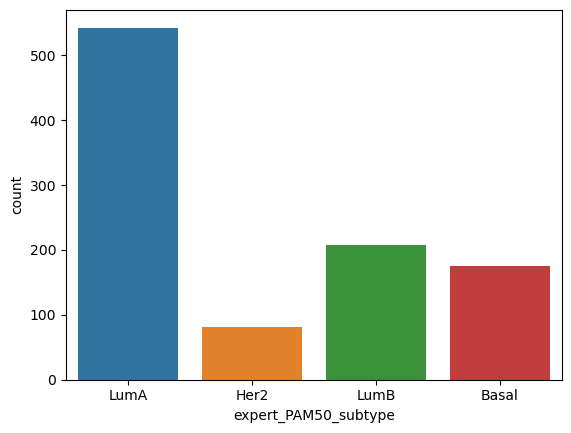

In [26]:
# Unbalanced LumA, Her2, LumB, and Basal
breast_df_reduced_4classes_unbalanced = df_final[df_final['expert_PAM50_subtype'] != 'Normal']
breast_df_reduced_4classes_unbalanced.shape
sns.countplot(x=breast_df_reduced_4classes_unbalanced['expert_PAM50_subtype'])

In [27]:
breast_df_reduced_4classes_unbalanced.to_csv(os.path.join(dire_BRCA, 'BRCA_dataset.csv'))